In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from io import StringIO

In [17]:
# コロナ感染データ
corona_data = """
pref_name,2020-01-16,2020-01-17,2020-01-18
Hokkaido,3,4,300
Aomori,231,333,56
"""

# 県ごとの緯度経度データ
latlong_data = """
pref_name,lat,lon
Hokkaido,43.064359,141.347449
Aomori,40.824294,140.740054
"""

# データをDataFrameに読み込む
corona_df = pd.read_csv(StringIO(corona_data))
latlong_df = pd.read_csv(StringIO(latlong_data))

# データを結合
merged_df = pd.merge(corona_df, latlong_df, on="pref_name")

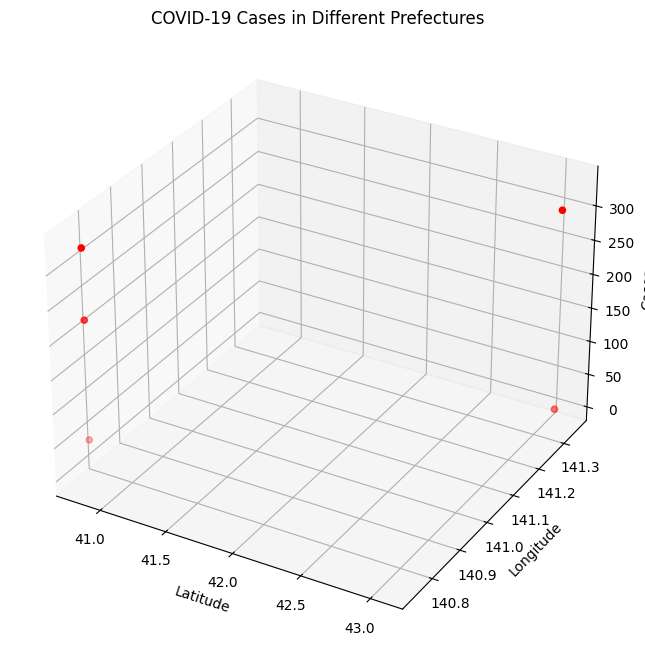

In [22]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# サンプルデータ
corona_data = """
pref_name,2020-1-16,2020-1-17,2020-1-18
Hokkaido,3,4,300
Aomori,231,333,56
"""

# 県ごとの緯度経度データ
latlong_data = """
pref_name,lat,lon
Hokkaido,43.064359,141.347449
Aomori,40.824294,140.740054
"""

# データをDataFrameに読み込む
corona_df = pd.read_csv(io.StringIO(corona_data), index_col='pref_name')
latlong_df = pd.read_csv(io.StringIO(latlong_data), index_col='pref_name')

# 3Dプロット
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# データのプロット
for pref_name, row in corona_df.iterrows():
    lat = latlong_df.loc[pref_name, 'lat']
    lon = latlong_df.loc[pref_name, 'lon']
    time_points = pd.to_datetime(row.index, format='%Y-%m-%d')
    cases = row.values.astype(int)
    
    # Z軸に時間、X軸に緯度、Y軸に経度をとって散布図をプロット
    ax.scatter(lat, lon, cases, c='red')

# グラフの設定
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Cases')
ax.set_title('COVID-19 Cases in Different Prefectures')

plt.show()
